In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

# Making Predictions: Linear Regression 

Classification isn't the only task within the scope of supervised machine learning. **Regression** is another equally important task with many complementary features. In regression, we are asked to make a real-valued prediction based upon a dataset of samples. As in classification, we can think of our dataset as an $N\times P$ matrix, with $N$ samples and $P$ features. However, for supervised tasks, instead of binary/multi-valued *labels* corresponding to partitions of the dataset, we are, often, interested in matching real-valued *response* variables. 

In the case of simple linear regression, the problems we look at are of the form
$$\mathbf{y} = \mathbf{X}\mathbf{w} + \mathbf{\xi},$$
where $\mathbf{y}$ are our response variables, the matrix $\mathbf{X}$ is our dataset, the vector $\mathbf{\xi}$ represents some noise or uncertainty on our model, and we hope to find the *explanatory* variables $\mathbf{w}$ which are able to match our observations and which generalize to future observations. Additionally, one can generalize to a wide class of so-called generalized linear models via
$$\mathbf{y} = {\rm f}(\mathbf{X}\mathbf{w}),$$
where $f(\cdot)$ is often some stochastic function.

Here, we will consider solving regressions via **maximum a posteriori (MAP)** approaches. From the Bayesian perspective we are often attempting to solve the problem
$${\rm arg~min}\quad -\log P(\mathbf{y}|\mathbf{X}, \mathbf{w}) - \log P(\mathbf{w}).$$ 
If we return to our first definition of linear regression, with additive noise that is assumed to be *iid* Gaussian, and assuming a uniform prior on the value of $\mathbf{w}$, we arrive at the common least squares (LSQ) problem,
$${\rm arg~min}_{\mathbf{w}} \quad ||\mathbf{y} - \mathbf{X} \mathbf{w} ||_2^2,$$
which we can interpret as a **maximum likelihood (ML)** solution.

Regressions, and specifically linear regressions, often form the basis of the ___"Do The Simplest Thing That Could Possibly Work."___ Many times in production, simple regressions provide good-enough performance which maximize the tradeoff against engineering costs (coding time, computer time). And, as we will later see, regressions can even be applied to solve classification tasks, as in *logistic* regression. So, truly, regressions should be the first step when encountering a new data-science or ML problem. Things can only, hopefully, go up from here!

## Simple Example

For example, let's think of the very simplest problem. How about a univariate problem,  
$$ y_i = \alpha x_i + \xi,$$
where the value of $x$ are our known data points, we observe some response variables $y$, and wish to estimate the scalar value of $\alpha$ which relates the two. To keep this problem from being entirely trivial, we introduce some Gaussian noise $\xi$ with variance $\sigma^2$.

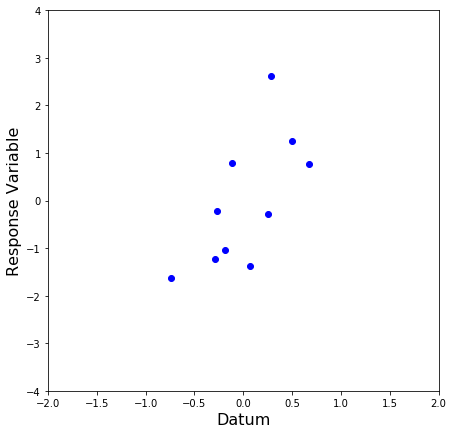

In [2]:
# Parameters
alpha = 2       # Model parameter to be learned
n = 10          # Number of samples to train with
var = 1.        # Noise variance

# Generate data
x = 2 * np.random.rand(n) - 1
beta = np.sqrt(var) * np.random.randn(n)
y = alpha * x + beta

# Visualize
plt.figure(figsize=(7,7))
plt.plot(x, y, 'ob')
plt.xlabel("Datum", fontsize=16)
plt.ylabel("Response Variable", fontsize=16)
plt.axis([-2, 2, -4, 4]);

So how can we estimate the response variable $\alpha$? In this case it should be quite easy to find the right value of $\alpha$, especially when we have a lot of data and the value of $\sigma^2$ is not too high. Lets make a calculation on paper of what this value should be in a Bayesian sense. First we write the likelihood,
$$ P(\mathbf{y} | \mathbf{x}, \alpha) = \frac{1}{(2\pi \sigma^2)^{N/2}} \exp\left[-\frac{(\mathbf{y} - \alpha \mathbf{x})^2}{2 \sigma^2}\right].$$
Now, for MAP estimation we want to look at the negative log value and we can drop any constant terms...

$$-\log P(\mathbf{y} | \mathbf{x}, \alpha) \propto (\mathbf{y} - \alpha \mathbf{x})^2 
=\mathbf{y}^T\mathbf{y} + \alpha^2 \mathbf{x}^T\mathbf{x} - 2 \alpha \mathbf{y}^T\mathbf{x}$$

Now we have the problem
$${\rm arg~min}_\alpha \quad -\log P(\mathbf{y}|\mathbf{x}, \alpha)
= {\rm arg~min}_\alpha \quad \mathbf{y}^T\mathbf{y} + \alpha ^2\mathbf{x}^T\mathbf{x} -
2 \alpha \mathbf{y}^T\mathbf{x}
= {\rm arg~min}_\alpha \quad \alpha^2\mathbf{x}^T\mathbf{x} - 2 \alpha \mathbf{y}^T\mathbf{x}$$

Since this is a convex problem over $\alpha$, taking the minimizer is as simple as finding the root of the derivative, hence,
$$\alpha^* = {\rm arg~min}_\alpha \quad \alpha^2\mathbf{x}^T\mathbf{x} - 2\alpha\mathbf{y}^T\mathbf{x} = \frac{\mathbf{y}^T\mathbf{x}}{\mathbf{x^T}\mathbf{x}}$$


### Wakeup Task: Calculate the MAP $\alpha^*$

In [3]:
# Task 1
# Calculate the MAP estimate of `alpha` given the dataset `x` given observed `y`.
alpha_est = 
print("alpha* (ML): ", alpha_est)

SyntaxError: invalid syntax (<ipython-input-3-6e0d9ed6c033>, line 3)

In [18]:
# %load lr1.py
alpha_est = np.dot(y,x) / np.dot(x,x)
#alpha_est = (y.T@x) / (x.T@x)

print("alpha* (ML): ", alpha_est)


alpha* (ML):  2.1296082262773663


### Wakeup-Task: Brute-Force Search

*Step 1: Define Likelihood*

In [5]:
def likelihood(x, y, alpha, var):
    """
        Define the likelihood for a given set of data and expanatory variable $m$,
            y = alpha * x + noise (iid Gaussian with variance var)
    """
    l = 
    return l

SyntaxError: invalid syntax (<ipython-input-5-75f81cefcb40>, line 6)

In [8]:
# %load lr2.py
def likelihood(x, y, alpha, var):
    """
        Define the likelihood for a given set of data and explanatory variable $alpha$,
            y = alpha * x + noise (iid Gausian with variance var)
    """
    res = y - alpha * x
    likelihood = 1 / np.power(2 * np.pi * var, y.size/2) * np.exp(-.5 * np.dot(res, res) / var)
    return likelihood


*Step 2: Find all values*

In [9]:
# Initialize parameters
alpha_vals = np.linspace(-5, 5, 1000)
likelihood_vals = np.zeros(len(alpha_vals))

# Loop over values
for (i, alpha_test) in enumerate(alpha_vals):
    likelihood_vals[i] = likelihood(x, y, alpha_test, var)

*Step 3: Plot*

In [19]:
# Plot context
plt.figure(figsize=(10,5))

# Plot command
plt.plot(alpha_vals, likelihood_vals, label = "likelihood")

# Plot formatting
plt.xlim([-5, 5])
plt.yscale("log")
plt.xlabel("value of $m$",fontsize=16)
plt.ylabel("$P(y|F,x,m,\Delta)$", fontsize=16)
plt.axvline(alpha_est, color="k", linestyle=":", label=r"$\alpha$ (ML)")
plt.axvline(alpha, color="k", linestyle="-", label=r"$\alpha$ (true)", linewidth = 0.5)
plt.legend(loc=2)

NameError: name 'alpha_vals' is not defined

<Figure size 720x360 with 0 Axes>

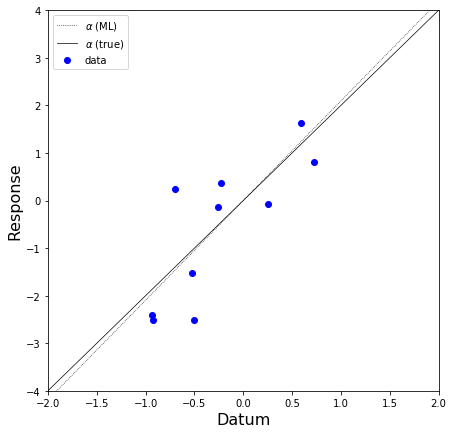

In [13]:
# Plot context
plt.figure(figsize=(7,7))

# Plot command
plt.plot(np.linspace(-5,5,100), alpha_est * np.linspace(-5,5,100), ":k", linewidth=0.7, label=r"$\alpha$ (ML)")
plt.plot(np.linspace(-5,5,100), alpha * np.linspace(-5,5,100), "-k", linewidth=0.7, label=r"$\alpha$ (true)")
plt.plot(x,y, "ob", label = "data")

# Plot formatting
plt.axis([-2, 2, -4, 4])
plt.xlabel("Datum",fontsize = 16)
plt.ylabel("Response", fontsize = 16)
plt.legend(loc=2)

So we can see that even for this simple test, when the number of samples is low, we can mismatch the correct value of the slope, even for a quite easy problem like this. 

## Multiple Features

Lets take a look at some models with more than one feature. How can we solve these problems? In the context of linear regression, our features might be linear or non-linear, however the problem remains linear in terms of the predictors. For example, one could attempt to fit a polynomial model, 
$$ y = w_0 + w_1 x + w_2 x^2 + \cdots + w_P x^P,$$
using a linear regression, e.g.
$$ \mathbf{y} = [\mathbf{1}, \mathbf{x}, \mathbf{x}^2, \cdots, \mathbf{x}^P] \times \boldsymbol{w} = \mathbf{X}\boldsymbol{w}.$$

A simple least squares can be used to fit such a model. Lets take a look at an example where the underlying model is an order-2 polynomial (quadratic).

Text(0,0.5,'Response Variable')

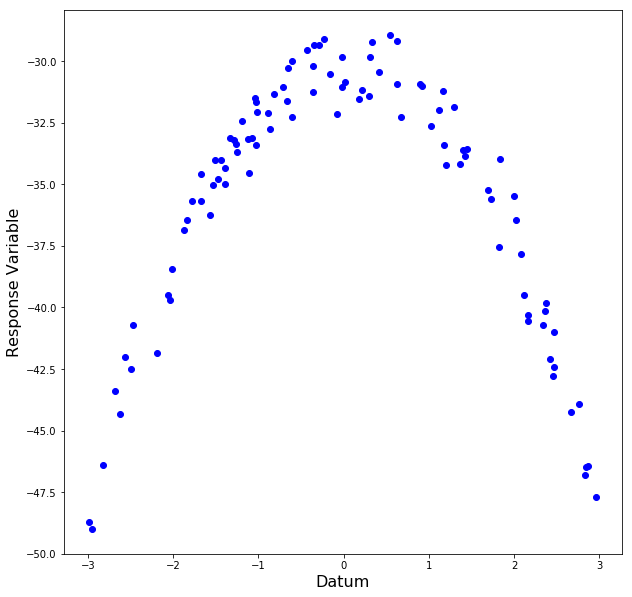

In [20]:
# Problem parameters
a = -2          # Order 2 coefficient
b = 0.1         # Order 1 coefficient
c = -30         # Offset
n = 100         # Number of samples to train with
var = 1.        # Observational noise variance

# Generate data
x = 6 * np.random.rand(n) - 3
noise = np.sqrt(var) * np.random.randn(n)
y = a * x ** 2 + b * x + c + noise

# Visualize
plt.figure(figsize=(10,10))
plt.plot(x,y,'ob')
plt.xlabel("Datum",fontsize = 16)
plt.ylabel("Response Variable", fontsize = 16)

Now, to solve this problem, we need to build the matrix of features. Since we are interested in polynomial fitting, lets write a function which builds the feature matrix for us.

### Task: Create Power Features


In [21]:
def power_features(x, max_power):
    """
        Given a vector of data points, x, build a matrix of power
        features from 0 (constant) up to power p for use with
        polynomial fitting.
    """
    # Initialize data matrix
    X = np.zeros((x.shape[0], max_power + 1))
    
    return X

In [22]:
# %load lr3.py
def power_features(x, max_power):
    """
        Given a vector of data points, x, build a matrix of power
        features from 0 (constant) up to power p for use with
        polynomial fitting.
    """
    # Initialize data matrix
    X = np.zeros((x.shape[0], max_power + 1))

    for p in range(0, max_power+1):
        X[:, p] = x ** p
    
    return X


Now, lets make a fit. So, how do we solve for all of the coefficients at once? We can follow through the same as in the simple slope regression example and arrive at the solution for the ML estimate. Another way of looking at this is to see the problem through the lens of linear algebra, we want to find an estimate which minimizes the _residual sum of squares_,

$$\hat{\boldsymbol{w}} = {\rm arg~min}_{\boldsymbol{w}}\quad{\rm RSS}(\boldsymbol{w}) 
= {\rm arg~min}_{\boldsymbol{w}}\quad ||\mathbf{y} - \mathbf{X}\boldsymbol{w}||_2^2 $$

Finding the minimum of this convex cost is simply finding the zero of the gradient, as before,
$$ \frac{\partial{\rm RSS}}{\partial\boldsymbol{w}} =
-2\mathbf{X}^T(\mathbf{y} - \mathbf{X}\boldsymbol{w}),$$

$$\therefore\quad
   \hat{\boldsymbol{w}} = (\mathbf{X}^T\mathbf{X})^{-1}
   \mathbf{X}^T\mathbf{y},
$$
which gives us the classical LSQ solution (as presented in lecture). 

Now, let us take a look at fitting higher dimensional models to our dataset above. First, we just need to create the different feature sets for the different models.

In [23]:
# Create different models
X_quad = power_features(x,2)
X_cube = power_features(x,3)
X_silly = power_features(x,10)

In [24]:
# Least-squares directly using linalg.lstsq
fit_quad = np.linalg.lstsq(X_quad, y)[0]
fit_cube = np.linalg.lstsq(X_cube, y)[0]
fit_silly = np.linalg.lstsq(X_silly, y)[0]

# Show fit params
print("Fit quad. Model: ", fit_quad)
print("Fit cubic Model: ", fit_cube)
print("Fit silly Model: ", fit_silly)

Fit quad. Model:  [-30.05775606   0.13765254  -1.9929125 ]
Fit cubic Model:  [-3.00394551e+01  2.73541064e-01 -1.99378583e+00 -2.62007150e-02]
Fit silly Model:  [-3.01983471e+01  2.65087389e-01 -1.99891714e+00 -1.23051859e-01
  2.55214824e-01  9.37344790e-02 -1.22325439e-01 -2.17400042e-02
  2.00056423e-02  1.42395688e-03 -1.07900019e-03]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the 

And, visualizing what these different models are on our dataset, we see the following.

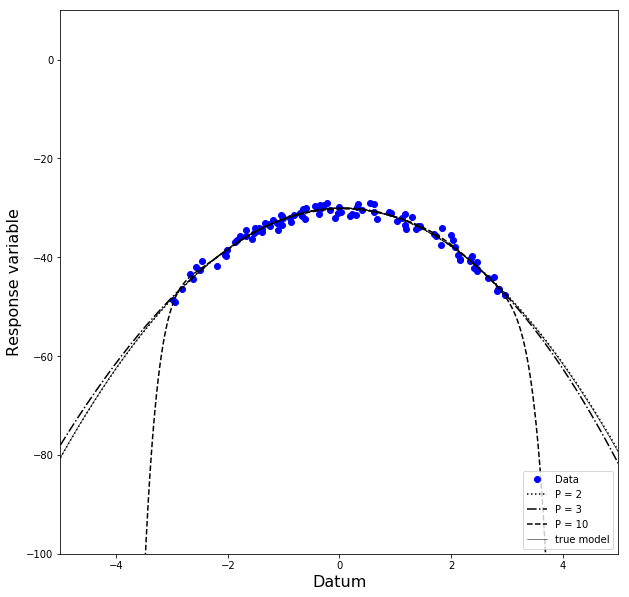

In [25]:
# Create fit curve domain
xdom = np.linspace(-5, 5, 1000)
Xdom = power_features(xdom, 10)

# Predictions of different models
y_quad = np.dot(Xdom[:, 0:3], fit_quad)
y_cube = np.dot(Xdom[:, 0:4], fit_cube)
y_silly = np.dot(Xdom, fit_silly)

# Visualization
plt.figure(figsize=(10, 10))

plt.plot(x, y,'ob',label = 'Data')
plt.plot(xdom, y_quad,':k', label = 'P = 2')
plt.plot(xdom, y_cube,'-.k', label = 'P = 3')
plt.plot(xdom, y_silly,'--k', label = 'P = 10')
plt.plot(xdom, a * xdom ** 2 + b * xdom + c,'-k', linewidth = 0.5, label = 'true model')
plt.xlabel("Datum",fontsize = 16)
plt.ylabel("Response variable", fontsize = 16)
plt.axis([-5, 5, -100, 10])
plt.legend(loc=4)

So, we can see that within the range of the data points, with enough presented data, all of the models do well to fit the data. However, outside of those bounds, the error can be much larger. This is the problem of fitting versus generalization. In our case, the error agains the datapoints might be good for higher degree models...

In [26]:
# Compute training set RSS for different models
train_rss_quad = np.mean((y - np.dot(X_quad, fit_quad)) ** 2)
train_rss_cube = np.mean((y - np.dot(X_cube, fit_cube)) ** 2)
train_rss_silly = np.mean((y - np.dot(X_silly, fit_silly)) ** 2)

print("Trained RSS (quad): ", train_rss_quad)
print("Trained RSS (cube): ", train_rss_cube)
print("Trained RSS (silly): ", train_rss_silly)

Trained RSS (quad):  0.9286024505439465
Trained RSS (cube):  0.917261412908384
Trained RSS (silly):  0.8572135639453804


So, we can see that the crazy-high degree model does better at matching our training data. But we can visually see that this model has far too many parameters for the amount of data we have. It is able to fit the data while doing the wrong thing in general, as we can see...

In [27]:
# Generate test set
noise = np.sqrt(var) * np.random.randn(Xdom.shape[0])
y_test = np.dot(Xdom[:, 0:3], [c, b, a]) + noise

# Compute test set RSS for different models
test_rss_quad = np.mean((y_test - np.dot(Xdom[:, 0:3], fit_quad)) ** 2)
test_rss_cube = np.mean((y_test - np.dot(Xdom[:, 0:4], fit_cube)) ** 2)
test_rss_silly = np.mean((y_test - np.dot(Xdom, fit_silly)) ** 2)

print("Test RSS (quad): %0.5g" % test_rss_quad)
print("Test RSS (cube): %0.5g" % test_rss_cube)
print("Test RSS (silly): %0.5g" % test_rss_silly)

Test RSS (quad): 1.049
Test RSS (cube): 1.7655
Test RSS (silly): 8.8773e+05


So, a huge error when tested over a larger range of possible values! This shows that we, in some way, need to make sure that we use the simplest model possible that generalizes. However, in practice, we often don't know how simple or complex the underlying data is. There are a couple of approaches here. One is to simply acquire more data, and make sure that you acquire data over the whole range of possible values. But, scaling up data acquisition might not be feasible for some applications. How can we tune the parameters that we use? Lets take a look at **regularization**. 

## Regularization
In the examples we have looked at, we had a simple univariate problem and we were interested in making regressions according to functions (polynomials) of that cure datum. In this case, we have some discretion in choosing how complicated of a model to pick. And we have a natural way to scale the generalization capability of the model.

However, in practice we might not have such a convenience. Often in regression tasks we have some response variable, perhaps a patient diagnosis or an experimental result, and we have many, many features which were measured in parallel with that observation. We would like to estabilish some model of the result given some combination of these measured features. 

In this case, *a priori*, we have no idea which possible features we measure will be the best predictors. Our idea is simply to acquire as much data as we can and write an algorithm to find the correlations in the dataset. In this case, we need to have some method of *selecting* the best possible features. Additionally, we are often taking measurements of different features which might be highly correlated, thus reducing the overall predictiveness of our regression model (with respect to the number of measured features).

Regularization offers us a possiblity of accounting for some of these obstacles. We want to admit as complicated of a model as possible (to drive down fitting error), but we want some degree of regularization in order to also promote the *simplest* model as possible. Lets take a look at a few approaches.

### Ridge Regression
In ridge regression (RR), we want to fit our response variables, but we want the model parameters $\boldsymbol{w}$ to have a small variance. We can accomplish this via an $\ell_2$ penalty on the parameters,
$$ \hat{\boldsymbol{w}} = {\rm arg~min}_{\boldsymbol{w}}\quad
    \frac12 ||\mathbf{y}-\mathbf{X}\boldsymbol{w}||_2^2 + \lambda || \boldsymbol{w}||_2^2,$$
In this regression, the regularization term $\lambda$ serves as a tuning term which balances between the model fit and the variance of the model parameters. Because this regularization penalizes "long" parameter vectors via the $\ell_2$ norm, this kind of regression is often referred to as a **shrinkage**. 

There is a direct analytical solution to this regression, as in the case of least squares. We just need to solve
$$ \hat{\boldsymbol{w}} = 
    (\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I})^{-1}\mathbf{X}^T\mathbf{y}.
$$

As a test case, lets look at a random problem from high-dimensional statistics. Often we are confronted with *many* features, but *few* measurements. However, we also often know that of the many features we measure, potentially very few of them contribute significantly to our response variables.

In general, we cannot use an OLS estimator to solve such under-determined problems. There exists an entire null-space of potential solutions, and we have no information to guide us in how to make a unique solution. However, by using regression, we are enforcing a scoring to this space of solutions, allowing us to choose a "best" solution, up to how we define the regularization.

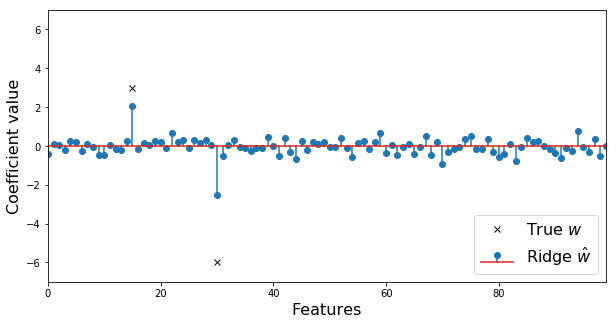

In [28]:
# Experiment parameters
n = 50           # Number of samples
p = 100          # Number of parameters
var = 0.1        # Model error variance
lam = 0.1        # Regularization level

# Generate features at random
X = np.random.randn(n, p) / np.sqrt(p)

# Create ground-truth model parameters
w_model = np.zeros(p)
w_model[15] = 3
w_model[30] = -6

# Form observations
y = np.dot(X, w_model) + np.sqrt(var) * np.random.randn(n)

# Ridge regression solution
lam_eye = lam * np.eye(p)
w_ridge = np.linalg.solve(np.dot(X.T, X) + lam_eye, np.dot(X.T, y))

# Visualization
plt.figure(figsize=(10, 5))
plt.stem(w_ridge, label=r'Ridge $\hat{w}$')
plt.plot(np.argwhere(w_model), w_model[w_model != 0], 'kx', label=r'True $w$')
plt.axis([0, p - 1, -7, 7])
plt.xlabel('Features', fontsize=16)
plt.ylabel('Coefficient value', fontsize=16)
plt.legend(loc=4, fontsize=16)

And we can see that voila, we have a solution! It isn't so close, but we can see that indeed we are able to see some correlation with the true model features. A question here is, what happens as we move the value of $\lambda$. One common way of looking at the effect of the regularization term on the estimator is through the **L-Curve**. In this plot we look at the balance between the solution norm and the residual.

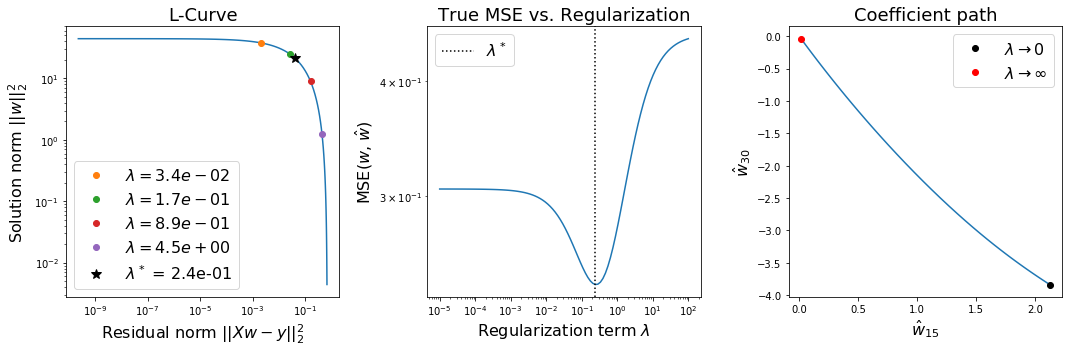

In [30]:
# Initialize empty arrays
lam_dom = np.logspace(-5, 2, 100)

rss = np.zeros(len(lam_dom))
reg = np.zeros(len(lam_dom))
mse = np.zeros(len(lam_dom))
d1 = np.zeros(len(lam_dom))
d2 = np.zeros(len(lam_dom))

# Compute different metrics for many $\lambda$
for (i, lam) in enumerate(lam_dom):
    lam_eye = lam * np.eye(p)
    fit = np.linalg.solve(np.dot(X.T,X) + lam_eye, np.dot(X.T,y))
    
    rss[i] = np.mean((y - np.dot(X, fit)) ** 2)
    reg[i] = np.sum(fit ** 2)
    mse[i] = np.mean((w_model - fit) ** 2)
    d1[i] = fit[15]
    d2[i] = fit[30]
    
best_lambda = lam_dom[np.argmin(mse)] 
best_rss = rss[np.argmin(mse)]
best_reg = reg[np.argmin(mse)]
    
# Visualize
plt.figure(figsize=(15, 5))  

plt.subplot(131)
plt.loglog(rss, reg)
plt.plot(rss[50], reg[50], 'o', label='$\\lambda = %0.1e$' % lam_dom[50])
plt.plot(rss[60], reg[60], 'o', label='$\\lambda = %0.1e$' % lam_dom[60])
plt.plot(rss[70], reg[70], 'o', label='$\\lambda = %0.1e$' % lam_dom[70])
plt.plot(rss[80], reg[80], 'o', label='$\\lambda = %0.1e$' % lam_dom[80])
plt.plot(best_rss, best_reg, '*k', label='$\\lambda^*$ = %0.1e' % best_lambda, markersize=10)
plt.xlabel('Residual norm $||X w - y||_2^2$', fontsize=16)
plt.ylabel('Solution norm $||w||_2^2$', fontsize=16)
plt.legend(loc=3, fontsize=16)
plt.title('L-Curve', fontsize=18)

plt.subplot(132)
plt.loglog(lam_dom, mse)
plt.axvline(best_lambda, color='k', linestyle=':', label=r'$\lambda^*$')
plt.xlabel(r'Regularization term $\lambda$', fontsize=16)
plt.ylabel(r'MSE($w$, $\hat{w}$)', fontsize=16)
plt.title(r'True MSE vs. Regularization', fontsize=18)
plt.legend(loc=2, fontsize=16)

plt.subplot(133)
plt.plot(d1, d2)
plt.plot(d1[0], d2[0],'ok', label='$\\lambda \\rightarrow 0$')
plt.plot(d1[-1], d2[-1],'or', label='$\\lambda \\rightarrow \\infty$')
plt.xlabel(r'$\hat{w}_{15}$', fontsize=16)
plt.ylabel(r'$\hat{w}_{30}$', fontsize=16)
plt.title('Coefficient path', fontsize=18)
plt.legend(loc=1, fontsize=16)

plt.tight_layout()

The idea of the L-Curve is to find the "balance" point between minimizing the solution norm and minimizing the residual norm, i.e. the bend of the curve. Another approach is simply to use cross validation, but it gives you an idea of the effect of the regularization. As $\lambda$ increases, the $||w||_2 \rightarrow 0$, hence the term shrinkage. But, we can decrease our bias by going in the direction $\lambda \rightarrow 0$. Here, we see that the solution norm rises, but one can minimize the residual error. However, in this case, we will probably fail on generalization.

Remark: when we increase $\lambda$, all the coefficients of $\boldsymbol{w}$ shrink. However, if we are lucky, the ones that are just due to noise will shrink **faster** than the ones that are non-zero in the original model.

### Lasso

Another approach that we can use is the Lasso for sparse regression. In this case, rather than penalizing the energy of the coefficients, $||\boldsymbol{w}||_2^2$, instead we penalize the $\ell_1$ norm, 
$$||\boldsymbol{w}||_1 = \sum_i |w_i|.$$
When we use this prior we are promoting the **sparsity** of the parameters. This should place hard-zeros on "insignificant" features, and assign most of the model weight to a few features. 

The estimator for the Lasso is written similarily as
$$\hat{\boldsymbol{w}} = {\rm arg~min}_{\boldsymbol{w}} 
\quad \frac{1}{2N} ||\mathbf{y} - \mathbf{X}\boldsymbol{w} ||_2^2 + \lambda ||\boldsymbol{w}||_1 $$
Remark: the factor $1/(2N)$ in front is a convention, that amounts to an overall scale for $\lambda$

How do we attempt to find this estimator? Unfortunately, there isn't a closed form solution for this estimator. Instead we need to write some convex optimization (or fixed-point iteration) to recover the estimator. We will do it at the end. For the moment, we will use the Lasso implemented in Scikit-Learn.

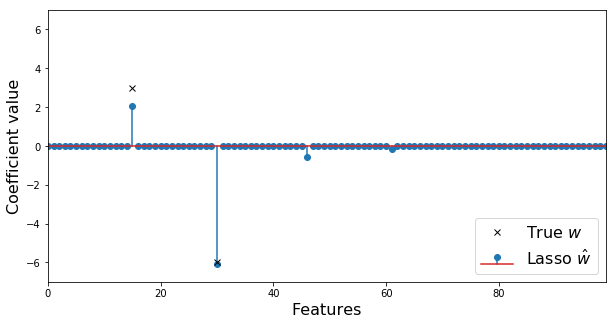

In [31]:
from sklearn import linear_model

# Initialize (in the sklearn routine, lambda is called alpha)
lasso = linear_model.Lasso(alpha=0.01)

# Fit to the data
lasso.fit(X,y)

# Visualization
plt.figure(figsize=(10,5))
plt.stem(lasso.coef_, label=r'Lasso $\hat{w}$')
plt.plot(np.argwhere(w_model), w_model[w_model != 0], 'kx',label=r'True $w$')
plt.axis([0, p-1, -7, 7])
plt.xlabel('Features', fontsize=16)
plt.ylabel('Coefficient value', fontsize=16)
plt.legend(loc=4, fontsize=16)

And so, we can now see that we can recover these two significant features quite easily using the $\ell_1$-regularization ! 

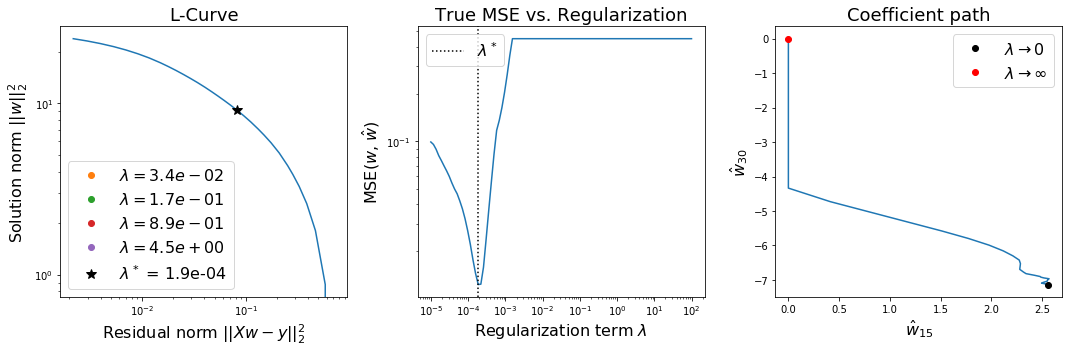

In [32]:
# Initialize empty arrays
lam_dom = np.logspace(-5, 2, 100)

rss = np.zeros(len(lam_dom))
reg = np.zeros(len(lam_dom))
mse = np.zeros(len(lam_dom))
d1 = np.zeros(len(lam_dom))
d2 = np.zeros(len(lam_dom))

# Compute different metrics for many $\lambda$
for (i, lam) in enumerate(lam_dom):
    fit = linear_model.Lasso(alpha=lam * n).fit(X, y)
    
    rss[i] = np.mean((y - fit.predict(X)) ** 2)
    reg[i] = np.sum(np.abs(fit.coef_))
    mse[i] = np.mean((w_model - fit.coef_) ** 2)
    d1[i] = fit.coef_[15]
    d2[i] = fit.coef_[30]
    
best_lambda = lam_dom[np.argmin(mse)] 
best_rss = rss[np.argmin(mse)]
best_reg = reg[np.argmin(mse)]
    
# Visualize
plt.figure(figsize=(15, 5))  

plt.subplot(131)
plt.loglog(rss, reg)
plt.plot(rss[50], reg[50], 'o', label='$\\lambda = %0.1e$' % lam_dom[50])
plt.plot(rss[60], reg[60], 'o', label='$\\lambda = %0.1e$' % lam_dom[60])
plt.plot(rss[70], reg[70], 'o', label='$\\lambda = %0.1e$' % lam_dom[70])
plt.plot(rss[80], reg[80], 'o', label='$\\lambda = %0.1e$' % lam_dom[80])
plt.plot(best_rss, best_reg, '*k', label='$\\lambda^*$ = %0.1e' % best_lambda, markersize=10)
plt.xlabel('Residual norm $||X w - y||_2^2$', fontsize=16)
plt.ylabel('Solution norm $||w||_2^2$', fontsize=16)
plt.legend(loc=3, fontsize=16)
plt.title('L-Curve', fontsize=18)

plt.subplot(132)
plt.loglog(lam_dom, mse)
plt.axvline(best_lambda, color='k', linestyle=':', label=r'$\lambda^*$')
plt.xlabel(r'Regularization term $\lambda$', fontsize=16)
plt.ylabel(r'MSE($w$, $\hat{w}$)', fontsize=16)
plt.title(r'True MSE vs. Regularization', fontsize=18)
plt.legend(loc=2, fontsize=16)

plt.subplot(133)
plt.plot(d1, d2)
plt.plot(d1[0], d2[0],'ok', label='$\\lambda \\rightarrow 0$')
plt.plot(d1[-1], d2[-1],'or', label='$\\lambda \\rightarrow \\infty$')
plt.xlabel(r'$\hat{w}_{15}$', fontsize=16)
plt.ylabel(r'$\hat{w}_{30}$', fontsize=16)
plt.title('Coefficient path', fontsize=18)
plt.legend(loc=1, fontsize=16)

plt.tight_layout()

Remarks:

$\bullet$ For Lasso, one can prove that the coefficients all evolve linearly in $\lambda$ until one of them vanishes; at that point, all the others evolve linearly but with different slopes.

$\bullet$ We can see in the 'coefficient path' plot that the last two coefficients to vanish when $\lambda\to\infty$ are $\hat{w}_{15}$ and then $\hat{w}_{30}$

### Lasso algorithm

The estimator for the Lasso is
$$\hat{\boldsymbol{w}} = {\rm arg~min}_{\boldsymbol{w}} 
\quad \frac1{2N} ||\mathbf{y} - \mathbf{X}\boldsymbol{w} ||_2^2 + \lambda ||\boldsymbol{w}||_1 $$
which is equivalent to
$$\hat{\boldsymbol{w}} = {\rm arg~min}_{\boldsymbol{w}} 
\quad  \frac1{2N} (\boldsymbol{w}^T X^T X \boldsymbol{w} -2\mathbf{y}^T\mathbf{X}\boldsymbol{w}) + \lambda ||\boldsymbol{w}||_1 $$

Defining $A = X^T X/N$ and $B^T = \mathbf{y}^T X/N$, we have
$$\hat{\boldsymbol{w}} = {\rm arg~min}_{\boldsymbol{w}} 
\quad  \frac12\boldsymbol{w}^T A \boldsymbol{w} - B^T \boldsymbol{w}  + \lambda ||\boldsymbol{w}||_1 $$

Taking the derivative with respect to $w_i$, we obtain
$$A_{ii} w_i + \sum_{j(\neq i)}A_{ij} w_j - B_i + \lambda \, \operatorname{sign} (w_i) = A_{ii} w_i - V_i + \lambda \operatorname{sign} (w_i) = 0 $$
where
$$V_i = B_i - \sum_{j(\neq i)}A_{ij} w_j$$

The solution is, if $|V_i| > \lambda$
$$w_i = (V_i - \lambda \operatorname{sign} (V_i)) \, \big/ \, A_{ii}$$
and zero otherwise.

The Lasso algorithm consists in solving iteratively for each of the $w_i$ and repeat until convergence. Let us implement this scheme below.

In [ ]:
# Finds minimum of 1 / (2n) * (y - Xw)^2 + \gamma |w|, n = len(y)
def my_lasso(X, y, gamma, eps=1e-5):
    # Initialize variables
    n, p = X.shape
    w = np.zeros(p)

    # Rephrase problem as .5 * w^T A w - B w + \gamma |w|
    A = np.dot(X.T, X) / n
    B = np.dot(X.T, y) / n

    # Iteration over all variables
    diff = eps + 1
    while (diff > eps):
        w_old = np.copy(w)  
        for j in range(p):
            w[j] = 0
            V = B[j] - np.dot(w, A[j, :])
            if (abs(V) > gamma):          
                w[j] = (V - gamma * np.sign(V)) / A[j, j]
        diff = max(abs(w - w_old));
    return w

We now generate some very simple test data and compare our implementation to that of scikitlearn.

In [ ]:
from sklearn import linear_model

# Generate test data
X = np.array([[1, 2, 3], [4, 3, 2]])
w = np.array([1, 0, 0])
y = np.dot(X, w)
alpha = 1.

# Run my_lasso
%time w_hat = my_lasso(X, y, alpha)
objective = sum((y - np.dot(X, w_hat)) ** 2) / (2 * len(y)) + alpha * sum(w_hat)
print('my_lasso -- objective = %g, non-zero coefs.: %s\n' % (objective, w_hat[[w_hat != 0]]))

# Run scikitlearn's Lasso
clf = linear_model.Lasso(alpha=alpha, fit_intercept=False)
%time clf.fit(X, y) 
objective = sum((y - np.dot(X, clf.coef_)) ** 2) / (2 * len(y)) + alpha * sum(clf.coef_)
print('sklearn\'s Lasso -- objective = %g, non-zero coefs.: %s' % (objective, clf.coef_[[clf.coef_ != 0]]))

Our implementation actually ran faster than scikitlearn's, even though we did it in Python and theirs is in C! That is because our test data is very small, and just calling the C function takes longer than running it. Let us try again with a bigger instance.

In [ ]:
# Generate test data
X = np.random.randn(20, 100)
w = np.zeros(100)
w[5] = 3.
w[25] = -3.
y = np.dot(X, w)
alpha = 1.

# Run my_lasso
%time w_hat = my_lasso(X, y, alpha)
objective = sum((y - np.dot(X, w_hat)) ** 2) / (2 * len(y)) + alpha * sum(w_hat)
print('my_lasso -- objective = %g, non-zero coefs.: %s\n' % (objective, w_hat[[w_hat != 0]]))

# Run scikitlearn's Lasso
clf = linear_model.Lasso(alpha=alpha, fit_intercept=False)
%time clf.fit(X, y) 
objective = sum((y - np.dot(X, clf.coef_)) ** 2) / (2 * len(y)) + alpha * sum(clf.coef_)
print('sklearn\'s Lasso -- objective = %g, non-zero coefs.: %s' % (objective, clf.coef_[[clf.coef_ != 0]]))

### Logistic regression, and the representer theorem